<a href="https://colab.research.google.com/github/ishinidewmini/Image-Processing-Assignment-01/blob/main/Ishini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the original image in grayscale
# Replace 'runway.png' with the actual path to your image file
img = cv2.imread('runway.png', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if img is None:
    print("Error: Image 'runway.png' not found or could not be loaded. Please ensure the file is in the correct directory.")
else:
    # Normalize the pixel intensities to the range [0, 1] as required by the formulas
    img_norm = img / 255.0

    # --- (a) Gamma correction with gamma = 0.5 ---
    # Formula: s = r^gamma
    gamma_a = 0.5
    img_a = np.power(img_norm, gamma_a)

    # --- (b) Gamma correction with gamma = 2 ---
    gamma_b = 2.0
    img_b = np.power(img_norm, gamma_b)

    # --- (c) Contrast Stretching (linear piecewise transformation) ---
    # Parameters given: r1 = 0.2, r2 = 0.8
    r1, r2 = 0.2, 0.8

    # Create an output array for contrast stretching
    img_c = np.zeros_like(img_norm)

    # Apply piecewise logic:
    # 1. s = 0 for r < r1
    img_c[img_norm < r1] = 0

    # 2. s = (r - r1) / (r2 - r1) for r1 <= r <= r2
    mask = (img_norm >= r1) & (img_norm <= r2)
    img_c[mask] = (img_norm[mask] - r1) / (r2 - r1)

    # 3. s = 1 for r > r2
    img_c[img_norm > r2] = 1

    # --- Convert results back to [0, 255] range for display ---
    img_a_res = np.uint8(img_a * 255)
    img_b_res = np.uint8(img_b * 255)
    img_c_res = np.uint8(img_c * 255)

    # --- Visualization ---
    titles = ['Original', 'Gamma = 0.5 (a)', 'Gamma = 2 (b)', 'Contrast Stretching (c)']
    images = [img, img_a_res, img_b_res, img_c_res]

    plt.figure(figsize=(12, 10))
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

Please upload the runway image:


Saving runway.png to runway.png


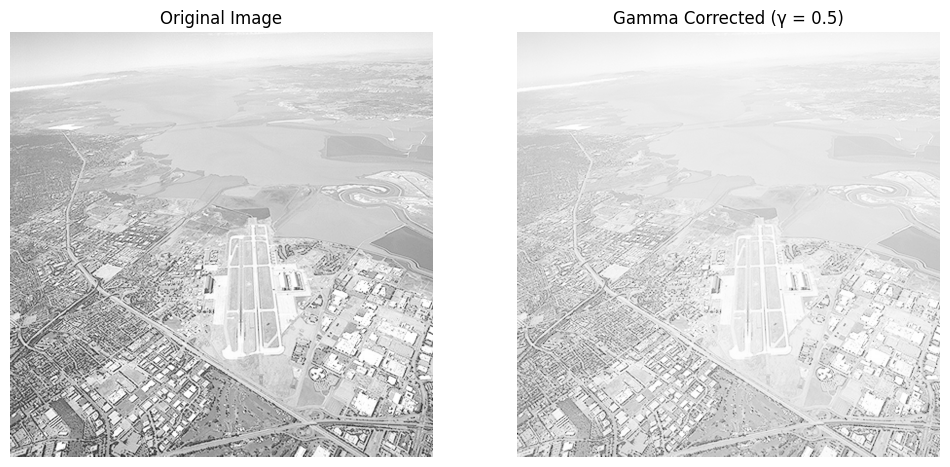

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("Please upload the runway image:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2. Read the image in grayscale
img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# 3. Normalize intensity to the range [0, 1]
# This is crucial for the power function to work correctly
img_norm = img / 255.0

# 4. Apply Gamma Correction: s = r^gamma
gamma = 0.5
res_norm = np.power(img_norm, gamma)

# 5. Convert back to [0, 255] range and uint8 format for display
res_img = np.uint8(res_norm * 255)

# 6. Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(res_img, cmap='gray')
plt.title(f'Gamma Corrected (γ = {gamma})')
plt.axis('off')

plt.show()

Please upload the runway image:


<>:36: SyntaxWarning: invalid escape sequence '\g'
<>:36: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-3605267139.py:36: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f'Gamma Correction ($\gamma$ = {gamma})')


Saving runway.png to runway (1).png


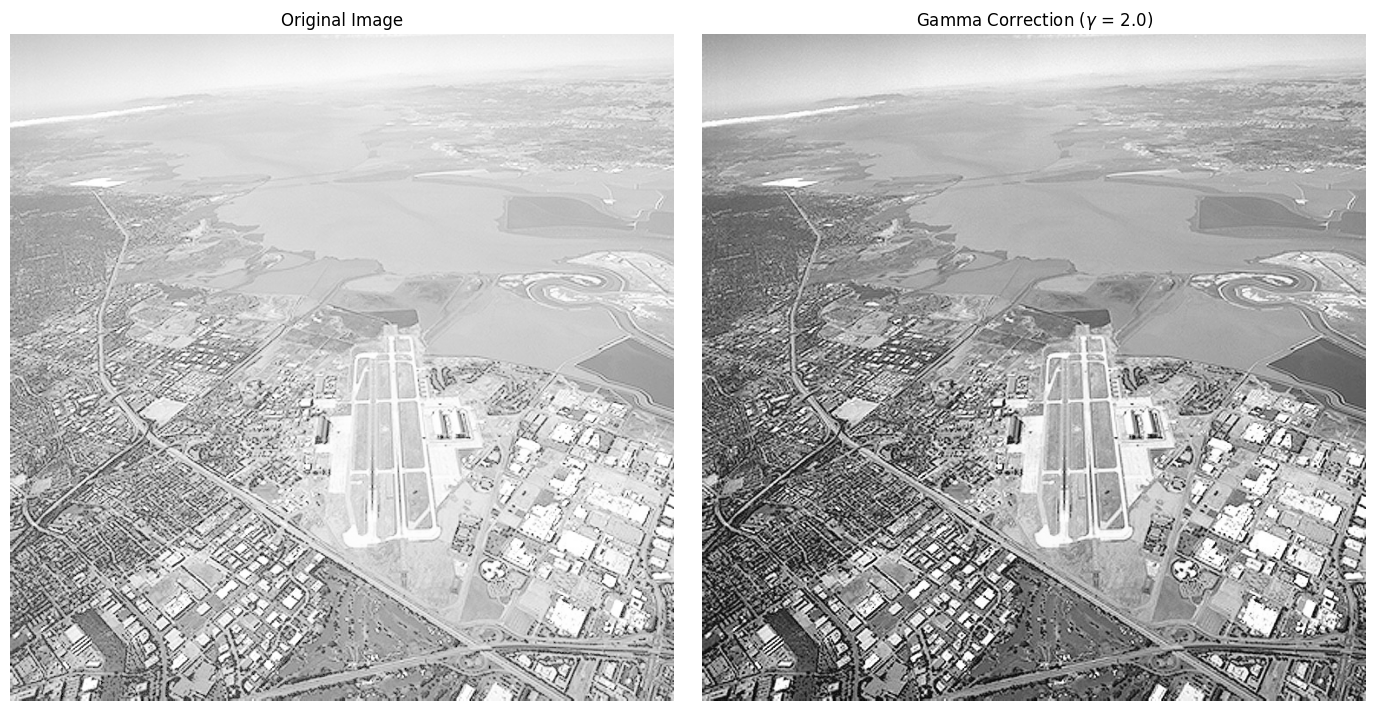

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1. Upload the image file
print("Please upload the runway image:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 2. Load the image in grayscale
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# 3. Normalize the pixel intensities to the range [0, 1]
# Intensity transformation formulas are typically applied to normalized values.
img_normalized = img / 255.0

# 4. Apply Gamma correction with gamma = 2
# Formula: s = r^gamma
gamma = 2.0
img_gamma = np.power(img_normalized, gamma)

# 5. Convert back to [0, 255] range for display
img_gamma_rescaled = np.uint8(img_gamma * 255)

# 6. Display original and transformed images side-by-side
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gamma_rescaled, cmap='gray')
plt.title(f'Gamma Correction ($\gamma$ = {gamma})')
plt.axis('off')

plt.tight_layout()
plt.show()


Please upload the runway image:


Saving runway.png to runway (2).png


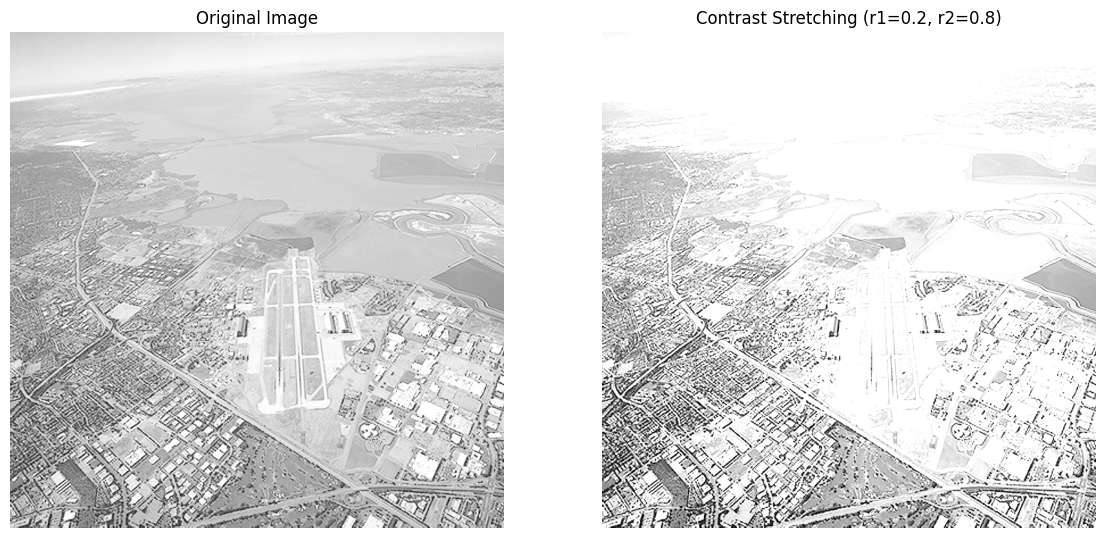

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1. Upload the image file from your computer
print("Please upload the runway image:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 2. Read the image in grayscale
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# 3. Normalize pixel intensities to the range [0, 1]
r = img / 255.0

# 4. Define Contrast Stretching parameters
r1 = 0.2
r2 = 0.8

# 5. Apply the piecewise transformation:
# s = 0,                      r < r1
# s = (r - r1) / (r2 - r1),   r1 <= r <= r2
# s = 1,                      r > r2
s = np.zeros_like(r)

# Case 1: r < r1 (already zeros)
# Case 2: r1 <= r <= r2
mask = (r >= r1) & (r <= r2)
s[mask] = (r[mask] - r1) / (r2 - r1)

# Case 3: r > r2
s[r > r2] = 1.0

# 6. Convert the result back to 8-bit range [0, 255]
img_stretched = np.uint8(s * 255)

# 7. Visualize the results side-by-side
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_stretched, cmap='gray')
plt.title(f'Contrast Stretching (r1={r1}, r2={r2})')
plt.axis('off')

plt.show()

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Use cv2.imshow for local script

# 1. Load the image
img = cv2.imread('input_image.jpg')

# 2. Convert from BGR to L*a*b* color space
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# 3. Split the planes
l_plane, a_plane, b_plane = cv2.split(lab)

# 4. Normalize the L plane to the range [0, 1]
l_norm = l_plane / 255.0

# 5. Apply Gamma Correction (s = r^gamma)
gamma = 0.5
l_gamma = np.power(l_norm, gamma)

# 6. Scale back to [0, 255] and convert to 8-bit integer
l_corrected = np.uint8(l_gamma * 255)

# 7. Merge the corrected L plane back with original a and b planes
lab_corrected = cv2.merge([l_corrected, a_plane, b_plane])

# 8. Convert back to BGR for display
final_img = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2BGR)

# Display the result
cv2_imshow(final_img)

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Please upload the image:


Saving highlights_and_shadows.jpg to highlights_and_shadows.jpg


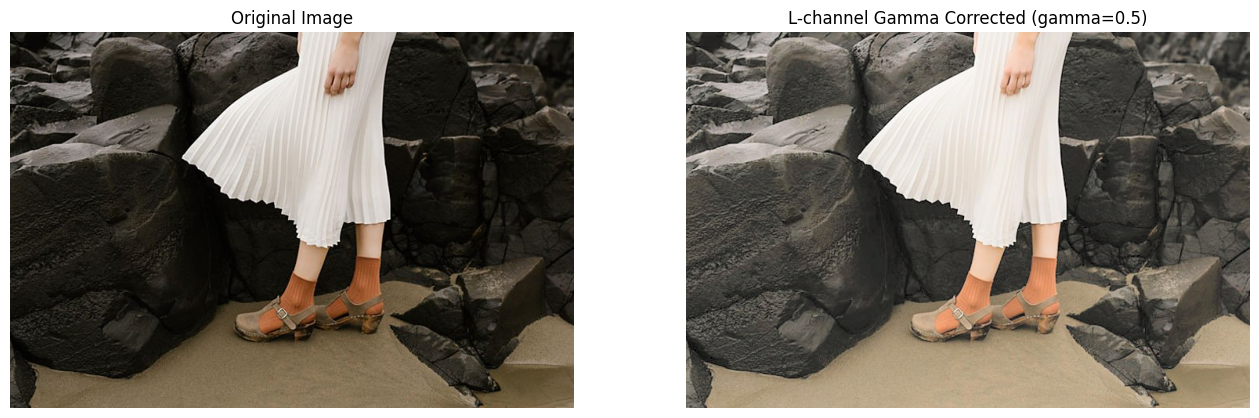

Transformation applied: L_new = L_old^0.5


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1. Upload the image file
print("Please upload the image:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 2. Read the image
img_bgr = cv2.imread(filename)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 3. Convert from BGR to Lab color space
# OpenCV's Lab L-channel range is [0, 255] for 8-bit images
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2Lab)
l_channel, a_channel, b_channel = cv2.split(img_lab)

# 4. State and Apply Gamma Correction to the L plane
# Selected Gamma value
gamma = 0.5

# Normalize L channel to [0, 1] for calculation
l_normalized = l_channel / 255.0

# Apply the power-law transformation: s = r^gamma
l_gamma = np.power(l_normalized, gamma)

# Scale back to [0, 255]
l_gamma_corrected = np.uint8(l_gamma * 255)

# 5. Merge the modified L channel back with original a and b channels
img_lab_corrected = cv2.merge([l_gamma_corrected, a_channel, b_channel])

# 6. Convert back to RGB for display
res_bgr = cv2.cvtColor(img_lab_corrected, cv2.COLOR_Lab2BGR)
res_rgb = cv2.cvtColor(res_bgr, cv2.COLOR_BGR2RGB)

# 7. Visualization
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(res_rgb)
plt.title(f'L-channel Gamma Corrected (gamma={gamma})')
plt.axis('off')

plt.show()

print(f"Transformation applied: L_new = L_old^{gamma}")



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def bilateral_filter_manual(image, d, sigma_s, sigma_r):
# Get image dimensions
h, w = image.shape
# Create the output image
output = np.zeros((h, w), dtype=np.float32)
# Pad the image to handle borders
radius = d // 2
padded_image = cv2.copyMakeBorder(image, radius, radius, radius, radius, cv2.BORDER_REFLECT)
# Pre-compute the spatial Gaussian kernel (it's constant for the whole image)
# Distance from center (0,0) to (x,y)
y_coords, x_coords = np.mgrid[-radius:radius+1, -radius:radius+1]
spatial_kernel = np.exp(-(x_coords**2 + y_coords**2) / (2 * sigma_s**2))
# Loop over every pixel in the image (This is slow in Python, but correct for "manual")
for i in range(h):
for j in range(w):
center_val = padded_image[i + radius, j + radius]
neighborhood = padded_image[i:i+d, j:j+d]
intensity_diff = neighborhood - center_val
range_kernel = np.exp(-(intensity_diff**2) / (2 * sigma_r**2))
combined_weights = spatial_kernel * range_kernel
norm_factor = np.sum(combined_weights)

IndentationError: expected an indented block after function definition on line 4 (ipython-input-2169014369.py, line 6)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def zoom_image(img, s, method='bilinear'):
    """
    Zooms an image by factor s using specified method.
    img: Input image (numpy array)
    s: zoom factor
    method: 'nearest' or 'bilinear'
    """
    old_h, old_w = img.shape[:2]
    new_h, new_w = int(old_h * s), int(old_w * s)

    # Create output image
    if len(img.shape) == 3: # Color
        zoomed = np.zeros((new_h, new_w, img.shape[2]), dtype=np.uint8)
    else: # Grayscale
        zoomed = np.zeros((new_h, new_w), dtype=np.uint8)

    # Pre-calculate source coordinates
    # We use a small offset (0.5) to align pixel centers better
    x_coords = np.arange(new_w) / s
    y_coords = np.arange(new_h) / s

    if method == 'nearest':
        # Nearest Neighbor: round coordinates to nearest integer
        src_x = np.round(x_coords).astype(int)
        src_y = np.round(y_coords).astype(int)

        # Clip to ensure coordinates are within bounds
        src_x = np.clip(src_x, 0, old_w - 1)
        src_y = np.clip(src_y, 0, old_h - 1)

        # Vectorized mapping
        zoomed = img[src_y[:, None], src_x]

    elif method == 'bilinear':
        for i in range(new_h):
            for j in range(new_w):
                src_x = j / s
                src_y = i / s

                x1 = int(np.floor(src_x))
                y1 = int(np.floor(src_y))
                x2 = min(x1 + 1, old_w - 1)
                y2 = min(y1 + 1, old_h - 1)

                dx = src_x - x1
                dy = src_y - y1

                # Interpolate
                wa = (1 - dx) * (1 - dy)
                wb = dx * (1 - dy)
                wc = (1 - dx) * dy
                wd = dx * dy

                zoomed[i, j] = (wa * img[y1, x1] + wb * img[y1, x2] +
                                wc * img[y2, x1] + wd * img[y2, x2])

    return zoomed

def compute_normalized_ssd(orig, zoomed):
    """Computes Normalized Sum of Squared Differences between two images."""
    # Ensure they are the same size
    if orig.shape != zoomed.shape:
        zoomed = cv2.resize(zoomed, (orig.shape[1], orig.shape[0]))

    # Use float for calculation to avoid overflow
    diff = orig.astype(np.float32) - zoomed.astype(np.float32)
    ssd = np.sum(diff**2)

    # Normalize by number of pixels and max possible squared difference (255^2)
    normalized_ssd = ssd / (orig.size * (255**2))
    return normalized_ssd

# --- Execution ---

print("Please upload the ORIGINAL LARGE image first, then the SMALL zoomed-out image:")
uploaded = files.upload()
file_names = list(uploaded.keys())

if len(file_names) >= 2:
    # Assuming first is original, second is small version
    img_orig = cv2.cvtColor(cv2.imread(file_names[0]), cv2.COLOR_BGR2RGB)
    img_small = cv2.cvtColor(cv2.imread(file_names[1]), cv2.COLOR_BGR2RGB)

    # Calculate required zoom factor s
    s = img_orig.shape[1] / img_small.shape[1]
    print(f"Detected Zoom Factor s: {s:.2f}")

    # Process
    img_nn = zoom_image(img_small, s, method='nearest')
    img_bl = zoom_image(img_small, s, method='bilinear')

    # Compute SSDs
    ssd_nn = compute_normalized_ssd(img_orig, img_nn)
    ssd_bl = compute_normalized_ssd(img_orig, img_bl)

Please upload the ORIGINAL LARGE image first, then the SMALL zoomed-out image:


Saving Picture1.jpg to Picture1.jpg


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def zoom_image(img, s, method='bilinear'):
    """
    Zooms an image by factor s using specified method.
    img: Input image (numpy array)
    s: zoom factor
    method: 'nearest' or 'bilinear'
    """
    old_h, old_w = img.shape[:2]
    new_h, new_w = int(old_h * s), int(old_w * s)

    # Create output image
    if len(img.shape) == 3: # Color
        zoomed = np.zeros((new_h, new_w, img.shape[2]), dtype=np.uint8)
    else: # Grayscale
        zoomed = np.zeros((new_h, new_w), dtype=np.uint8)

    # Pre-calculate source coordinates
    # We use a small offset (0.5) to align pixel centers better
    x_coords = np.arange(new_w) / s
    y_coords = np.arange(new_h) / s

    if method == 'nearest':
        # Nearest Neighbor: round coordinates to nearest integer
        src_x = np.round(x_coords).astype(int)
        src_y = np.round(y_coords).astype(int)

        # Clip to ensure coordinates are within bounds
        src_x = np.clip(src_x, 0, old_w - 1)
        src_y = np.clip(src_y, 0, old_h - 1)

        # Vectorized mapping
        zoomed = img[src_y[:, None], src_x]

    elif method == 'bilinear':
        for i in range(new_h):
            for j in range(new_w):
                src_x = j / s
                src_y = i / s

                x1 = int(np.floor(src_x))
                y1 = int(np.floor(src_y))
                x2 = min(x1 + 1, old_w - 1)
                y2 = min(y1 + 1, old_h - 1)

                dx = src_x - x1
                dy = src_y - y1

                # Interpolate
                wa = (1 - dx) * (1 - dy)
                wb = dx * (1 - dy)
                wc = (1 - dx) * dy
                wd = dx * dy

                zoomed[i, j] = (wa * img[y1, x1] + wb * img[y1, x2] +
                                wc * img[y2, x1] + wd * img[y2, x2])

    return zoomed

def compute_normalized_ssd(orig, zoomed):
    """Computes Normalized Sum of Squared Differences between two images."""
    # Ensure they are the same size
    if orig.shape != zoomed.shape:
        zoomed = cv2.resize(zoomed, (orig.shape[1], orig.shape[0]))

    # Use float for calculation to avoid overflow
    diff = orig.astype(np.float32) - zoomed.astype(np.float32)
    ssd = np.sum(diff**2)

    # Normalize by number of pixels and max possible squared difference (255^2)
    normalized_ssd = ssd / (orig.size * (255**2))
    return normalized_ssd

# --- Execution ---

print("Please upload the ORIGINAL LARGE image first, then the SMALL zoomed-out image:")
uploaded = files.upload()
file_names = list(uploaded.keys())

if len(file_names) >= 2:
    # Assuming first is original, second is small version
    img_orig = cv2.cvtColor(cv2.imread(file_names[0]), cv2.COLOR_BGR2RGB)
    img_small = cv2.cvtColor(cv2.imread(file_names[1]), cv2.COLOR_BGR2RGB)

    # Calculate required zoom factor s
    s = img_orig.shape[1] / img_small.shape[1]
    print(f"Detected Zoom Factor s: {s:.2f}")

    # Process
    img_nn = zoom_image(img_small, s, method='nearest')
    img_bl = zoom_image(img_small, s, method='bilinear')

    # Compute SSDs
    ssd_nn = compute_normalized_ssd(img_orig, img_nn)
    ssd_bl = compute_normalized_ssd(img_orig, img_bl)

Please upload the ORIGINAL LARGE image first, then the SMALL zoomed-out image:


Saving Picture1.jpg to Picture1 (1).jpg


Please upload the image you want to sharpen:


Saving highlights_and_shadows.jpg to highlights_and_shadows.jpg


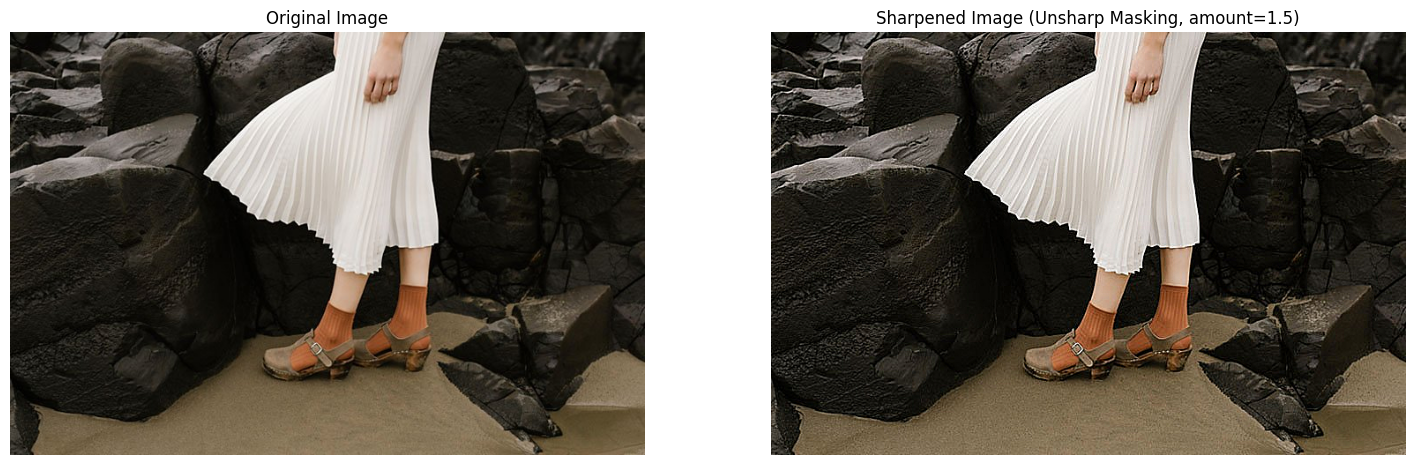

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1. Upload your chosen image
print("Please upload the image you want to sharpen:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 2. Read the image and convert to RGB for plotting
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# --- Method: Unsharp Masking ---
# Step 1: Apply Gaussian Blur
# 'ksize' is the window size, 'sigma' controls the blur extent.
gaussian_blur = cv2.GaussianBlur(img_rgb, (5, 5), 1.0)

# Step 2: Calculate the sharpened image
# Formula: sharpened = original + amount * (original - blurred)
# We use cv2.addWeighted for a stable calculation
# amount = 1.5 is a good starting point for noticeable sharpening
amount = 1.5
sharpened = cv2.addWeighted(img_rgb, 1.0 + amount, gaussian_blur, -amount, 0)

# Ensure pixel values are within the valid [0, 255] range
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

# 3. Visualize the Results
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened)
plt.title(f'Sharpened Image (Unsharp Masking, amount={amount})')
plt.axis('off')

plt.show()

Please upload the image of the woman by the window:


Saving looking_out.jpg to looking_out.jpg

(a) Resulting Otsu Threshold Value: 101.0


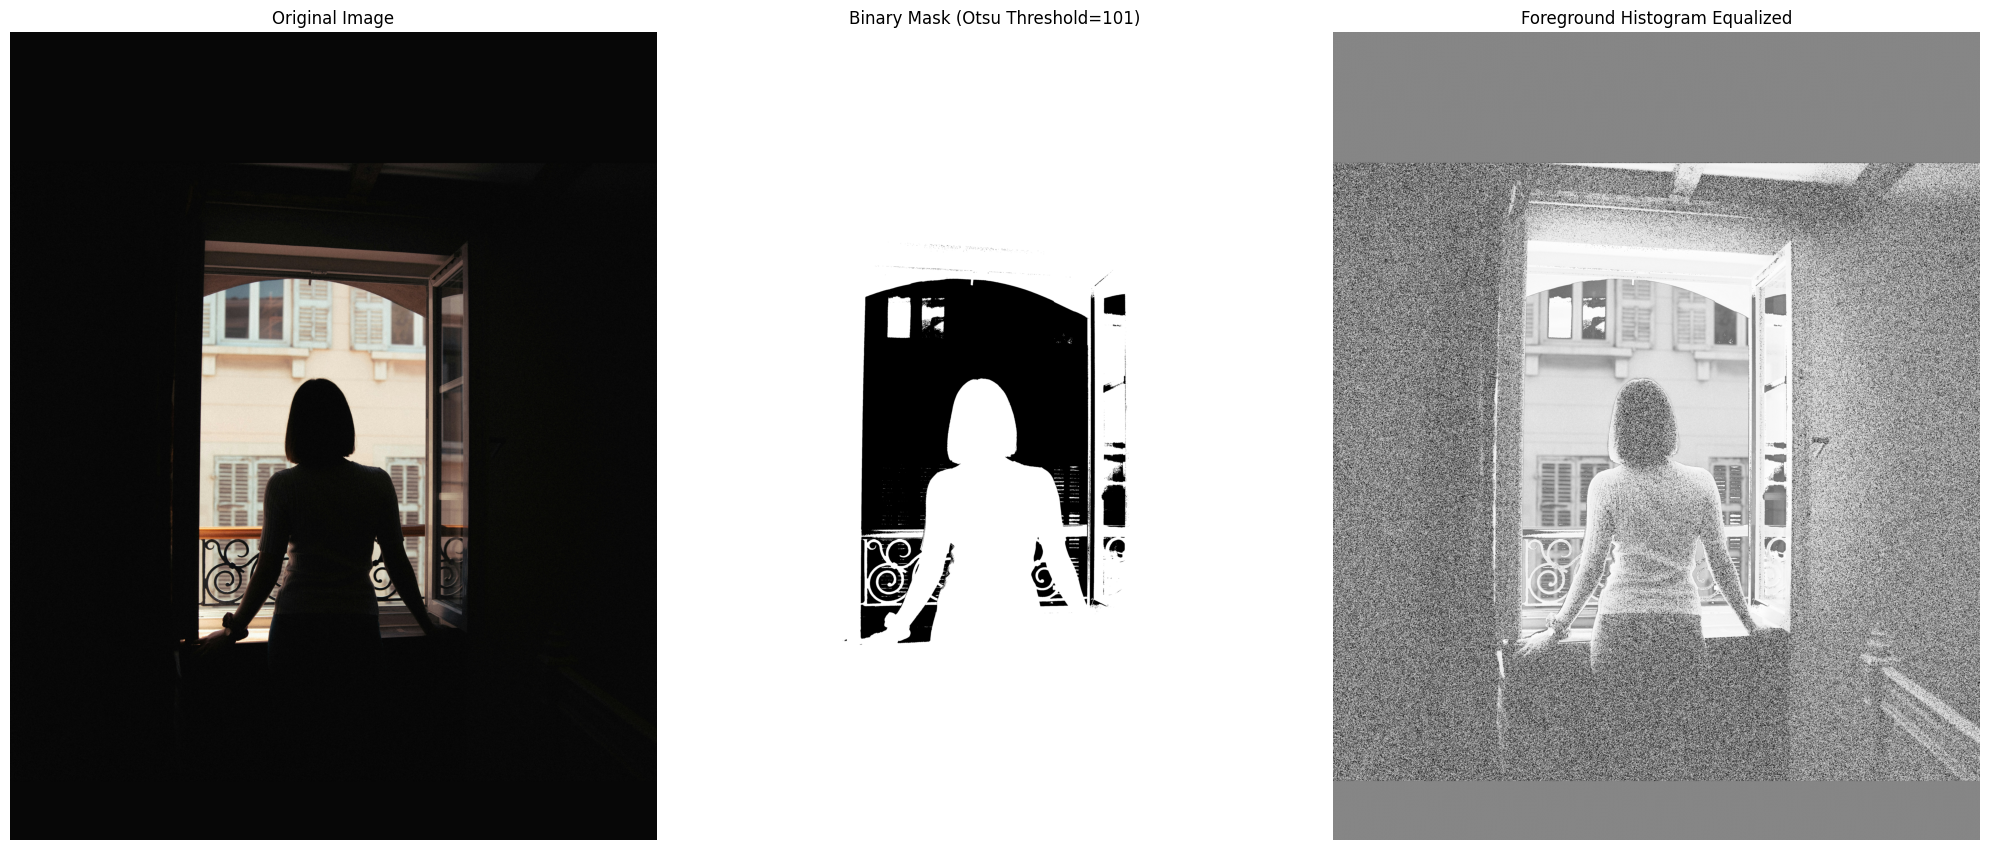

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1. Upload the image
print("Please upload the image of the woman by the window:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 2. Convert to grayscale
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- (a) Otsu Thresholding ---
# In this image, the foreground (woman and room) is dark, and the background (outside) is bright.
# We use THRESH_BINARY_INV so the foreground pixels become 255 (white) in the mask.
threshold_val, foreground_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

print(f"\n(a) Resulting Otsu Threshold Value: {threshold_val}")

# --- (b) Histogram Equalization for Foreground only ---
# We compute the histogram/CDF only based on the foreground pixels to maximize detail extraction there.
foreground_pixels = gray[foreground_mask == 255]

# Calculate histogram and Cumulative Distribution Function (CDF)
hist, bins = np.histogram(foreground_pixels.flatten(), 256, [0, 256])
cdf = hist.cumsum()
# Normalize CDF to range [0, 255]
cdf_mask = np.ma.masked_equal(cdf, 0)
cdf_mask = (cdf_mask - cdf_mask.min()) * 255 / (cdf_mask.max() - cdf_mask.min())
cdf = np.ma.filled(cdf_mask, 0).astype('uint8')

# Apply mapping to the foreground pixels
equalized_foreground_pixels = cdf[foreground_pixels]

# Create final image: keep background original, update foreground with equalized values
result_img = gray.copy()
result_img[foreground_mask == 255] = equalized_foreground_pixels

# --- Visualization ---
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(foreground_mask, cmap='gray')
plt.title(f'Binary Mask (Otsu Threshold={int(threshold_val)})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_img, cmap='gray')
plt.title('Foreground Histogram Equalized')
plt.axis('off')

plt.tight_layout()
plt.show()